In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd

In [16]:
# Load the dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('train_data.csv')

In [17]:
df.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,4a122afe-6e52-4ed0-840d-66155da95ba1,2259.833995,67.884986,1058.573968,31.799362,99.017120,10.507787,0.315652,0.982880,3328.915749,...,-0.812408,-0.156490,-0.000055,-0.000191,0.017395,0.007729,0.007729,2.250533,-0.812408,-0.156490
1,0848f722-52ec-420c-adb1-a1e90a2e2709,2430.367576,60.980572,1541.466293,38.677070,99.122594,13.644635,0.342359,0.877406,3985.478504,...,0.014594,-0.595771,-0.000035,-0.000671,0.021513,0.011262,0.011262,1.910181,0.014594,-0.595771
2,7814286a-f939-45a7-8620-82b339a7ad4b,989.800997,27.651929,2478.164707,69.232133,95.693128,111.535043,3.115939,4.306872,3579.500746,...,-0.470107,0.170303,0.000080,-0.001355,0.029976,0.015781,0.015781,1.899494,-0.470107,0.170303
3,de843d67-0ed3-4dfe-af91-78923dc31810,2025.914557,57.014236,1464.561241,41.216368,95.883762,62.872820,1.769396,4.116238,3553.348618,...,0.176038,-0.506675,0.000024,0.000587,0.023851,0.011562,0.011562,2.062848,0.176038,-0.506675
4,ba117ec1-3de8-4da3-a315-4c7716589439,1576.443907,71.274370,619.624143,28.014521,97.524479,15.728281,0.711109,2.475521,2211.796331,...,0.410326,0.208714,-0.000109,-0.000151,0.014282,0.007043,0.007043,2.027828,0.410326,0.208714


In [19]:
#visualizing the data as a histogram

import matplotlib.pyplot as plt
df.hist()
plt.rcParams['figure.figsize'] = [160,90]
plt.show()


In [20]:
# Extract features and labels
features = ['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
       'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD',
       'SDSD', 'SDRR_RMSSD','pNN25', 'pNN50', 'KURT', 'SKEW',
       'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR',
       'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR']

labels = ['HR']

In [21]:
X = df[features]
y = df[labels]

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=42)

In [39]:
# Create and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [40]:
gb_model

GradientBoostingRegressor(random_state=42)

In [41]:
gb_model.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor(random_state=42)

In [42]:
# Make predictions on the test set
y_pred = gb_model.predict(X_test)

In [43]:
# Evaluate the model using mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.40062168388724617


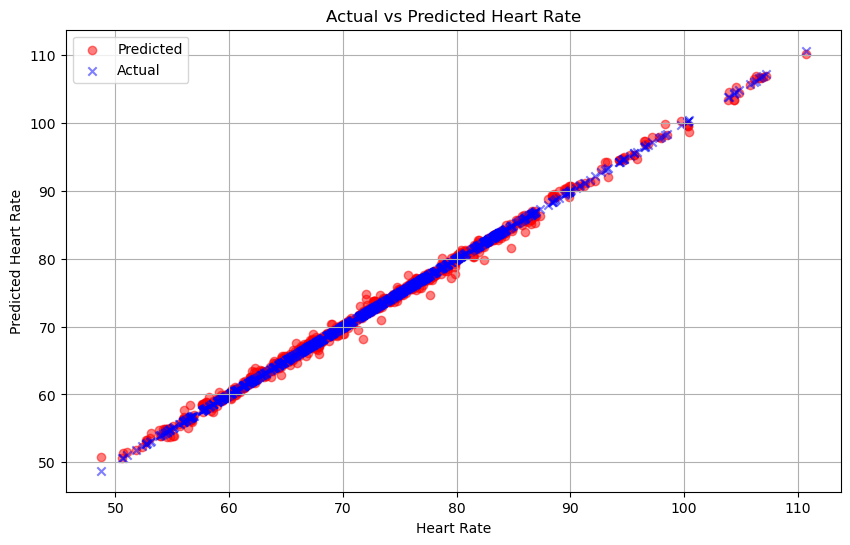

In [32]:
import matplotlib.pyplot as plt
# Scatter plot 
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5, marker='x')  # Actual values as 'x'
plt.title('Actual vs Predicted Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Predicted Heart Rate')
plt.legend()
plt.grid(True)
plt.show()


In [44]:
# Example: Print the first 10 predicted and actual values
print("Predicted HR:")
print(y_pred[:10])
print("Actual HR:")
print(y_test.values[:10])

Predicted HR:
[61.37342016 58.16077538 82.43752019 80.35590489 64.35713275 83.13859795
 81.70490009 89.39706877 64.12596938 82.38730074]
Actual HR:
[[61.23568227]
 [58.20363468]
 [82.44807694]
 [80.39417473]
 [65.38319083]
 [83.3962291 ]
 [82.34516396]
 [88.42402467]
 [64.5082503 ]
 [82.6768524 ]]


In [50]:
import joblib
model_filename = 'gradient_boosting_model.joblib'
joblib.dump(gb_model, model_filename)
print(f"Model saved as {model_filename}")

Model saved as gradient_boosting_model.joblib


In [45]:
data = pd.read_csv('sample_test_data.csv')

In [51]:
x_data = data[features]
x_uuid = data['uuid']

In [53]:
# Load the saved model for future use
loaded_model = joblib.load('gradient_boosting_model.joblib')

In [54]:
# Make predictions on the test set using the loaded model
y_pred_loaded = loaded_model.predict(x_data)

In [56]:
y_pred_loaded

array([75.290933  , 80.49648021, 62.27244964, 66.35962882, 64.67560399,
       57.60817447, 75.17181204, 62.07960759, 56.54374608, 71.22667053])

In [73]:
df['HR'] = pd.DataFrame(y_pred_loaded)

In [74]:
result_df = pd.concat([x_uuid, df['HR']], axis=1, ignore_index=True)

In [75]:
result_df.dropna()

,0,1
0,1ae30e0b-098e-46fc-a897-0a6661f26370,75.290933
1,428b41b3-9461-4c79-ab4e-d03b122b2553,80.496480
2,88f82ac7-02dd-447e-a289-22e8e22432c2,62.272450
3,1d09b18f-d82f-4c1a-bb2d-71fda6fea837,66.359629
4,a6302640-f70a-4a3a-ad36-a8c3d5df9400,64.675604
5,3f6508be-4b0a-4008-b701-49d8c2d5dd43,57.608174
6,a07d84c8-fc44-45ef-bb85-f06f06b70e9f,75.171812
7,f4a449db-a7ff-437b-852b-821a6e965f2f,62.079608
8,94364ef1-12e2-4ddd-9f35-99e270547849,56.543746
9,231d34f5-1028-4f2e-8e1d-00d086b0c218,71.226671


In [76]:
# Set column names and index
result_df.columns = ['uuid', 'HR']

In [77]:
result_df.dropna()

,uuid,HR
0,1ae30e0b-098e-46fc-a897-0a6661f26370,75.290933
1,428b41b3-9461-4c79-ab4e-d03b122b2553,80.496480
2,88f82ac7-02dd-447e-a289-22e8e22432c2,62.272450
3,1d09b18f-d82f-4c1a-bb2d-71fda6fea837,66.359629
4,a6302640-f70a-4a3a-ad36-a8c3d5df9400,64.675604
5,3f6508be-4b0a-4008-b701-49d8c2d5dd43,57.608174
6,a07d84c8-fc44-45ef-bb85-f06f06b70e9f,75.171812
7,f4a449db-a7ff-437b-852b-821a6e965f2f,62.079608
8,94364ef1-12e2-4ddd-9f35-99e270547849,56.543746
9,231d34f5-1028-4f2e-8e1d-00d086b0c218,71.226671


In [78]:
# Save as a CSV file
result_df.to_csv('result.csv', index=False)
print("Concatenated data saved to 'result.csv'")

Concatenated data saved to 'result.csv'
